In [2]:
# !pip install groq

In [3]:
# Import packages
from groq import Groq
import base64
from IPython.display import Image
import os

In [4]:

client = Groq(api_key="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")

# Define models
llama_3_2_Vision_11B = 'llama-3.2-11b-vision-preview'
llama31_model = 'llama-3.1-70b-versatile'

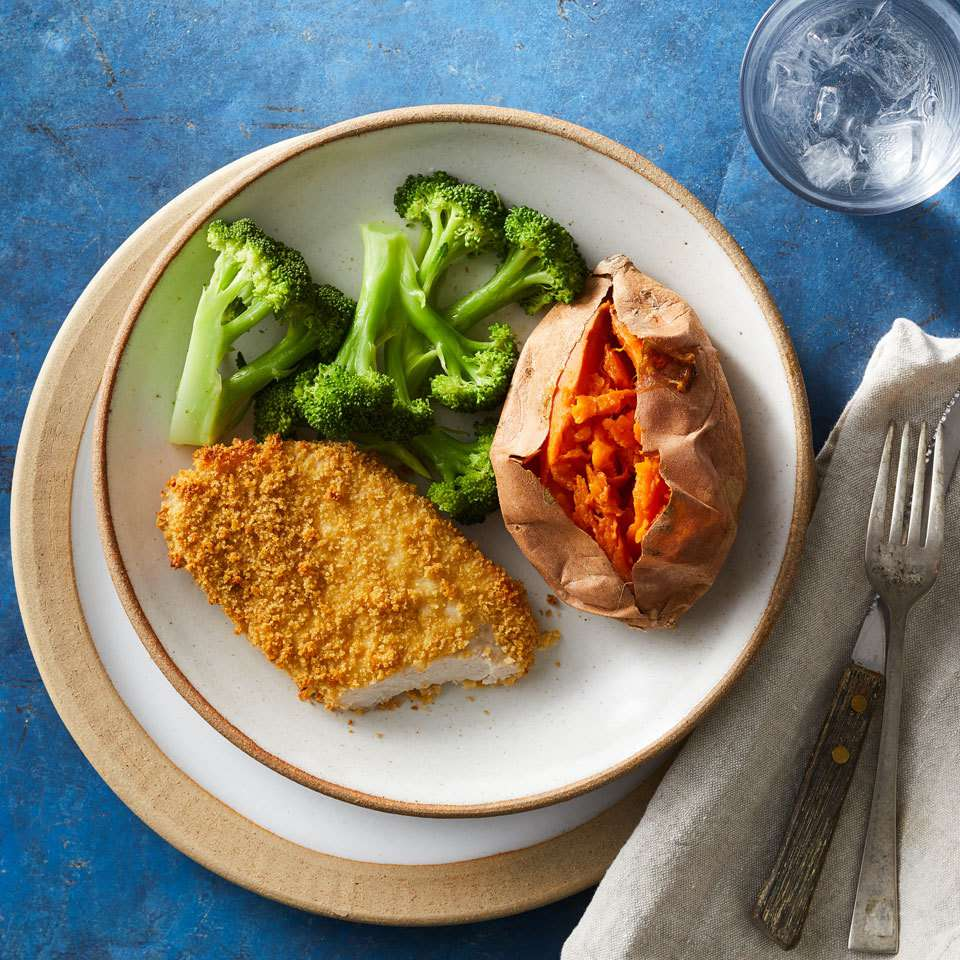

In [5]:
# Load and display image
image_path = r'C:\Users\pavan\Desktop\projects\VJ_HACK\childfood.jpg'
Image(image_path)

In [6]:
# Define image encoding function
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

base64_image = encode_image(image_path)

In [7]:
# Define image to text function
def image_to_text(client, model, base64_image, prompt):
    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "user",
                "content": [
                    {"type": "text", "text": prompt},
                    {
                        "type": "image_url",
                        "image_url": {
                            "url": f"data:image/jpeg;base64,{base64_image}",
                        },  
                    },
                ],
            }
        ],
        model=model,
        temperature=0,
        max_tokens=1024,
        top_p=1,
        stream=False,
        stop=None
       
    )

    return chat_completion.choices[0].message.content

prompt = '''

Analyze the provided image of a meal and estimate the portion sizes of the food items. Based on the estimated portion sizes, calculate the quantity of the following nutrients and provide the values in grams (g) or milligrams (mg) where applicable:

1. Calcium
2. Vitamin D
3. Iron
4. Protein
5. Fiber
6. Vitamin C
7. Added Sugars
8. Trans Fats
9. Saturated Fats
10. Sodium (Salt)
11. Caffeine
12. Artificial Sweeteners
13. Refined Carbohydrates
14. Processed Meats

Consider the size and type of the food items to estimate the nutritional values. For example:
- A large serving of dairy products may have higher calcium content.
- A portion of processed meats may contain higher sodium and saturated fats.

Only provide the estimated value for each nutrient in g or mg, along with the estimated portion size (small, medium, or large). Do not include any additional text or explanations.

**Example Output**:

Meal: A medium portion of grilled chicken, small portion of steamed broccoli, and medium portion of mashed potatoes.

1. Calcium: 25mg (small)
2. Vitamin D: 1µg (small)
3. Iron: 2.5mg (medium)
4. Protein: 35g (medium)
5. Fiber: 4g (small)
6. Vitamin C: 30mg (small)
7. Added Sugars: 0g (small)
8. Trans Fats: 0g (small)
9. Saturated Fats: 3g (medium)
10. Sodium (Salt): 400mg (medium)
11. Caffeine: 0mg (small)
12. Artificial Sweeteners: 0mg (small)
13. Refined Carbohydrates: 20g (medium)
14. Processed Meats: 0g (small)

'''
nutrients=image_to_text(client, llama_3_2_Vision_11B, base64_image, prompt)
print(nutrients)

**Meal Description**

* A large portion of breaded fish
* A medium portion of baked sweet potato
* A small portion of steamed broccoli

**Estimated Nutrient Values**

1. **Calcium**: 150mg (large)
2. **Vitamin D**: 0.5µg (large)
3. **Iron**: 3.5mg (large)
4. **Protein**: 45g (large)
5. **Fiber**: 6g (large)
6. **Vitamin C**: 40mg (small)
7. **Added Sugars**: 0g (small)
8. **Trans Fats**: 0g (small)
9. **Saturated Fats**: 5g (large)
10. **Sodium (Salt)**: 600mg (large)
11. **Caffeine**: 0mg (small)
12. **Artificial Sweeteners**: 0mg (small)
13. **Refined Carbohydrates**: 30g (large)
14. **Processed Meats**: 0g (small)


In [8]:
# Define function to analyze long-term safety based on the nutrient values
def analyze_safety(client, model, nutrient_values):
    safety_prompt = f"""
    Based on the following nutrient values, evaluate if the meal is safe for long-term consumption, considering factors like excess sugar, sodium, saturated fats, and artificial ingredients.

    Nutrient values provided:
    {nutrient_values}

    Please provide a summary stating whether the meal is safe for long-term consumption, and if not, which specific nutrients or elements pose potential health risks over time. Consider typical daily recommended values and health guidelines.
    """
    
    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "user",
                "content": safety_prompt
            }
        ],
        model=model,
        temperature=0,
        max_tokens=512,
        top_p=1,
        stream=False,
        stop=None
    )

    return chat_completion.choices[0].message.content

# Analyze safety of the nutrients
safety_analysis = analyze_safety(client, llama31_model, nutrients)
print(safety_analysis)


**Summary:**

The meal consisting of breaded fish, baked sweet potato, and steamed broccoli appears to be relatively balanced, but there are some concerns regarding long-term consumption. While the meal is rich in essential nutrients like protein, calcium, iron, and fiber, it also contains some potentially problematic elements.

**Potential Health Risks:**

1. **Sodium (Salt) Content:** The meal contains 600mg of sodium, which is approximately 25% of the daily recommended intake (2,300mg). Consuming high amounts of sodium over time can increase blood pressure, cardiovascular disease risk, and stroke risk.
2. **Saturated Fats:** The meal contains 5g of saturated fats, which is relatively high. The American Heart Association recommends limiting daily saturated fat intake to 5-6% of total daily calories. Consuming high amounts of saturated fats over time can increase cholesterol levels and cardiovascular disease risk.
3. **Refined Carbohydrates:** The meal contains 30g of refined carbohyd